<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/ReproducirGr%C3%A1ficoAAV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
from google.colab import drive
drive.mount('/content/drive') #  force_remount=True , pide eso no sé porqué
import pandas as pd
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt

filename = '/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/mortgages.csv'     # csv

df = pd.read_csv(filename)   # csv
#,skiprows = 4 --> Saltar filas del archivo y comenzar más abao

df.head() 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [290]:
#Cuentas los datos según las veces que aparecen
df['Mortgage Name'].value_counts()

30 Year    720
15 Year    360
Name: Mortgage Name, dtype: int64

## **Al Obtener los datos el index no es el mismo para ambos dataframe**

In [291]:
filtro_MortgageName3 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.03)

datos_3 = df[filtro_MortgageName3][['Interest Paid']].cumsum()

datos_3

,Interest Paid
0,1000.00
1,1998.28
2,2994.84
3,3989.67
4,4982.77
...,...
355,207064.13
356,207080.87
357,207093.44
358,207101.82


In [292]:
filtro_MortgageName5 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.05)
datos_5 = df[filtro_MortgageName5][['Interest Paid']].cumsum()
datos_5

,Interest Paid
360,1666.66
361,3331.32
362,4993.97
363,6654.60
364,8313.20
...,...
715,372928.64
716,372964.02
717,372990.60
718,373008.35


## **Forma 1 : Restando 360 al indice**

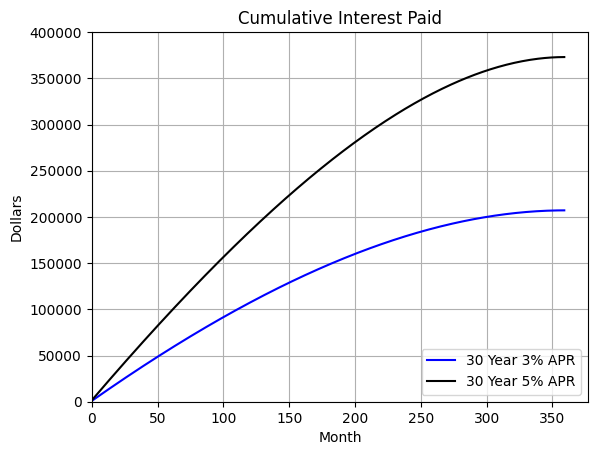

In [293]:
#Restando 360 al indice

filtro_MortgageName3 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.03)

datos_3 = df[filtro_MortgageName3][['Interest Paid']].cumsum()

indice =datos_3.index.max() 

filtro_MortgageName5 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.05)
datos_5 = df[filtro_MortgageName5][['Interest Paid']].cumsum()

plt.figure(dpi=100) #Creo la figura
plt.style.use('default')


plt.plot(datos_3.index  , datos_3.values         , c = 'blue')   # Datos Gráfico 1
plt.plot((datos_5.index -  360), datos_5.values  , c = 'black') # Datos Gráfico 2

plt.legend(labels=['30 Year 3% APR','30 Year 5% APR'], loc='lower right')
plt.title("Cumulative Interest Paid")
plt.xlabel("Month")
plt.ylabel("Dollars")
plt.axis( xmin=0 , ymin=datos_3.index.min(), ymax=400000)
plt.grid()

plt.show()

## **Forma 2 : Aplicando Modulo del Maximo del Menor al indice 2**

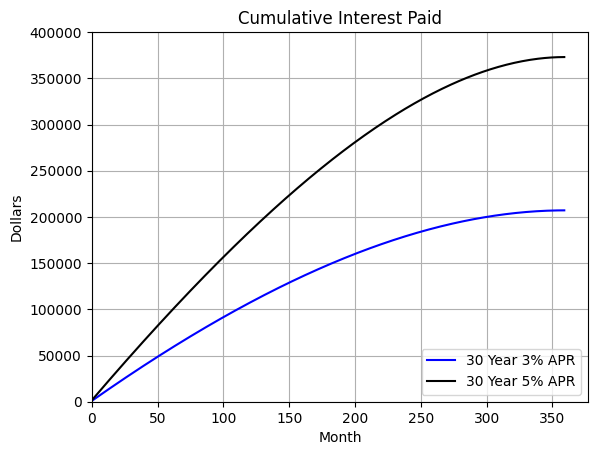

In [294]:
#Aplicando Modulo al indice 2

filtro_MortgageName3 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.03)
datos_3 = df[filtro_MortgageName3][['Interest Paid']].cumsum()

filtro_MortgageName5 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.05)
datos_5 = df[filtro_MortgageName5][['Interest Paid']].cumsum()

plt.figure(dpi=100) #Creo la figura
plt.style.use('default')

plt.plot( datos_3.index  , datos_3.values  , c = 'blue'  )   # Datos Gráfico 1
plt.plot( datos_5.index % ( datos_3.index.max() + 1 ) , datos_5.values  , c = 'black' ) # Datos Gráfico 2

plt.legend(labels=['30 Year 3% APR','30 Year 5% APR'], loc='lower right')
plt.title("Cumulative Interest Paid")
plt.xlabel("Month")
plt.ylabel("Dollars")
plt.axis( xmin=0 , ymin=datos_3.index.min(), ymax=400000)
plt.grid()

plt.show()

## **Forma 3 : Se regenera el indice en la misma línea**

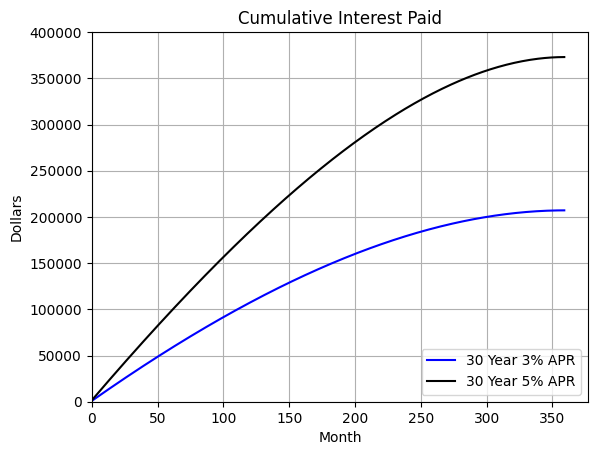

In [295]:
## **Se regenera el indice en la misma línea**

# Se regenera el indice en la misma línea
filtro_MortgageName3 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.03)
datos_3 = (df[filtro_MortgageName3][['Interest Paid']].cumsum()).reset_index(drop=True)


filtro_MortgageName5 = ( df['Mortgage Name'] ==  '30 Year' ) & (df['Interest Rate'] == 0.05)
datos_5 = (df[filtro_MortgageName5][['Interest Paid']].cumsum()).reset_index(drop=True)


plt.figure(dpi=100) #Creo la figura
plt.style.use('default')

plt.plot( datos_3.index  , datos_3.values  , c = 'blue'  ) # Datos Gráfico 1
plt.plot( datos_5.index  , datos_5.values  , c = 'black' ) # Datos Gráfico 2

plt.legend(labels=['30 Year 3% APR','30 Year 5% APR'], loc='lower right')
plt.title("Cumulative Interest Paid")
plt.xlabel("Month")
plt.ylabel("Dollars")
plt.axis( xmin=0 , ymin=datos_3.index.min(), ymax=400000)
plt.grid()

plt.show()